In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

# AIM
The aim of this project is to predict if a an observed patient has a heart disease or not based on observed attributes like age, sex, chest pain type etc.
This is a typical classification problem as the labels in target variable 'num' are binary. 0 for heart disease and 1 for no heart disease.

The dataset was downloaded from UCI Machine Learning Repository [http://archive.ics.uci.edu/ml/datasets/Heart+Disease]

## Source

Creators:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

Donor: 

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779



#### Data Set Information:

This original database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. 
The "num" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1. 
The Cleveland database was used for this report

## Dataset Attributes
age: The person's age in years \
sex: The person's sex (1 = male, 0 = female) \
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) \
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital) \
chol: The person's cholesterol measurement in mg/dl \
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) \
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) \
thalach: The person's maximum heart rate achieved \
exang: Exercise induced angina (1 = yes; 0 = no) \
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here) \
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) \
ca: The number of major vessels (0-3) \
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) \
target: Heart disease (0 = no, 1 = yes) 

### Importing the DataSet

In [268]:
#Importing the Cleveland DataSet on heart disease
clev_dataset = '/Users/seyi/MyDocuments/Data Science Projects/Datasets/heart_disease.csv'

In [269]:
#Reading the Dataset to Pandas DataFrame
pd_df=pd.read_csv(clev_dataset)

### Data Preparation and preprocessing

In [270]:
#Previewing the dataset
#Looking at the first 5 observations
pd_df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cal,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [271]:
#Looking at the last 5 observations
pd_df.tail()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cal,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [272]:
#In the last observation we notice the '?' in the thal column

In [273]:
#Checking for uniqueness
pd_df['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

In [274]:
pd_df['cal'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [275]:
#To drop the the rows with '?', we create a new data frame without the '?' value
pd_df = pd_df[pd_df['cal'].isin(['0','3','2','1']) == True]

In [276]:
pd_df = pd_df[pd_df['thal'].isin(['6','3','7']) == True]

In [277]:
pd_df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cal,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [278]:
pd_df.tail()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cal,thal,num
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [279]:
#Checking % of missing data per column
pd_df.isnull().mean()*100

age        0.0
sex        0.0
cp         0.0
restbps    0.0
chol       0.0
fbs        0.0
restecg    0.0
thalach    0.0
exang      0.0
oldpeak    0.0
slope      0.0
cal        0.0
thal       0.0
num        0.0
dtype: float64

In [280]:
#Checking the Datatype of our variables
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    int64  
 1   sex      297 non-null    int64  
 2   cp       297 non-null    int64  
 3   restbps  297 non-null    int64  
 4   chol     297 non-null    int64  
 5   fbs      297 non-null    int64  
 6   restecg  297 non-null    int64  
 7   thalach  297 non-null    int64  
 8   exang    297 non-null    int64  
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    int64  
 11  cal      297 non-null    object 
 12  thal     297 non-null    object 
 13  num      297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


Since we are not interested in the levels of heart disease for each patient but rather, we want to detect which 
patient has a heart disease. 
We would replace 1-4 showing the levels of the heart disease with 1 to indicate the presence 
of a heart disease and 0 if there's no detected heart disease.


In [281]:
#Replacing 1-4 for the 'num' target variable with 1
pd_df['num'].replace(to_replace=[0,1,2,3,4], value=[0,1,1,1,1],inplace=True)
pd_df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cal,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [282]:
pd_df.tail()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cal,thal,num
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [283]:
#converting cal variable to a numeric variable
pd_df['ca'] = pd.to_numeric(pd_df['cal'])

In [284]:
#Dropping the intial cal column
pd_df = pd_df.drop(columns='cal')

In [285]:
#converting thal variable to a numeric variable
pd_df['thal'] = pd.to_numeric(pd_df['thal'])

In [286]:
#We have 297 entries
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    int64  
 1   sex      297 non-null    int64  
 2   cp       297 non-null    int64  
 3   restbps  297 non-null    int64  
 4   chol     297 non-null    int64  
 5   fbs      297 non-null    int64  
 6   restecg  297 non-null    int64  
 7   thalach  297 non-null    int64  
 8   exang    297 non-null    int64  
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    int64  
 11  thal     297 non-null    int64  
 12  num      297 non-null    int64  
 13  ca       297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [287]:
#Rearraging our variables
pd_df=pd_df[['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']]

## Exploratory Data Analysis

In [288]:
#Summary of the dataset
pd_df.describe()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count of Target')]

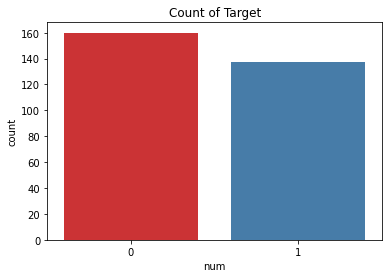

In [289]:
#Count of our target variable
sb.countplot(pd_df['num'],palette="Set1").set(title='Count of Target')
#Slightly more of the observed patients do not have any heart disease

[Text(0.5, 1.0, 'Distribution of patients by age')]

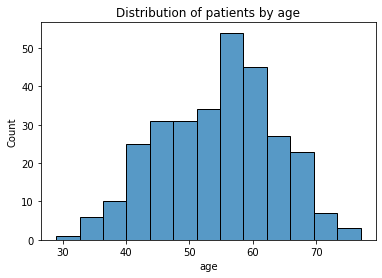

In [290]:
#Distribution of patients in our dataset by age
hist = sb.histplot(pd_df['age'])
hist.set(title='Distribution of patients by age')
#Majority of the patients are between 50 to 65 years

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Plot of sex of the patients')]

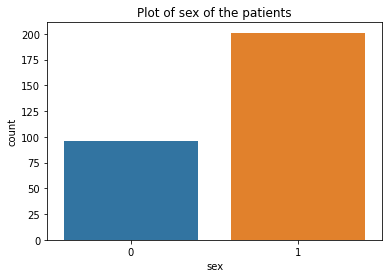

In [291]:
#Visualization of the sex of the patients
sb.countplot(pd_df['sex']).set(title='Plot of sex of the patients')

Text(0.5, 0.98, 'Distribution of Patients with heart disease by age')

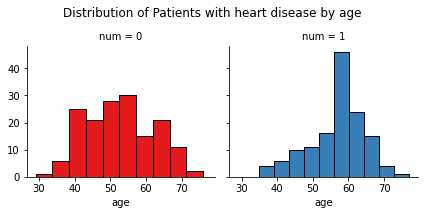

In [292]:
g = sb.FacetGrid(pd_df, col="num", hue="num", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', ec="k")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Patients with heart disease by age')
#Majority of the patients with suspected heart diseases are between 55 - 60years

In [293]:
#We make a subset of our dataset by looking at only does with suspected heart diseases
disease_df = pd_df[pd_df['num']==1]

In [294]:
disease_df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [295]:
#Label the sex variable. 0 for Female and 1 for Male
disease_df['sex'].replace(to_replace=[0,1], value=['Female','Male'],inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [296]:
#disease_df.groupby('sex').size().plot(kind='pie', autopct='%.2f')

[Text(0.5, 1.0, 'Sex of Patients with suspect heart disease')]

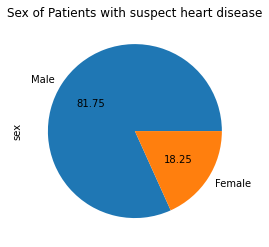

In [297]:
disease_df['sex'].value_counts().plot(kind='pie',autopct='%.2f').set(title='Sex of Patients with suspect heart disease')

[Text(0.5, 1.0, 'Distribution of patients by age')]

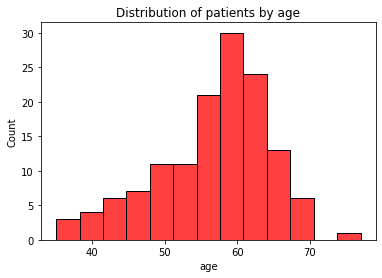

In [298]:
sb.histplot(disease_df['age'], color='red').set(title='Distribution of patients by age')
#We notice that majority of the patients are between age 55 to 60years

The CP variable represents chest pain type \
-- Value 1: typical angina \
-- Value 2: atypical angina \
-- Value 3: non-anginal pain \
-- Value 4: asymptomatic 

[Text(0.5, 1.0, 'Plot of Chest Pain Type levels')]

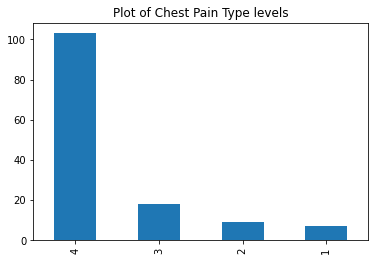

In [299]:
disease_df['cp'].value_counts().plot(kind='bar').set(title='Plot of Chest Pain Type levels')
#Majority of the observed patients with suspected heart disease were asymptomatic

In [300]:
#thalassemia in patients 
pd_df.groupby(['num'])['thal'].value_counts(normalize=True)*100

num  thal
0    3       79.375000
     7       16.875000
     6        3.750000
1    7       64.233577
     3       27.007299
     6        8.759124
Name: thal, dtype: float64

In [301]:
#64% of the patients with suspected heart disease had a reversible defect

In [302]:
#Visualizing the distribution of thalassemia 
thal_df = pd_df.copy()

In [303]:
thal_df['thal'] = pd_df["thal"].astype(str)

In [304]:
thal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    int64  
 1   sex      297 non-null    int64  
 2   cp       297 non-null    int64  
 3   restbps  297 non-null    int64  
 4   chol     297 non-null    int64  
 5   fbs      297 non-null    int64  
 6   restecg  297 non-null    int64  
 7   thalach  297 non-null    int64  
 8   exang    297 non-null    int64  
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    int64  
 11  ca       297 non-null    int64  
 12  thal     297 non-null    object 
 13  num      297 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 42.9+ KB


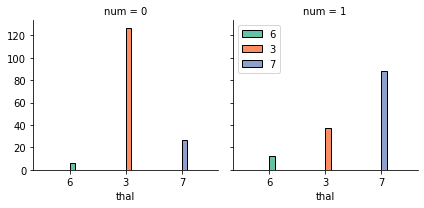

Text(0.5, 0.98, 'Plot of the different types of thalassemia in patients')

In [305]:
g = sb.FacetGrid(thal_df, col="num", hue='thal', palette="Set2", col_wrap=2)
g.map(plt.hist, 'thal', ec="k")
g.axes[-1].legend()
plt.show()
g.fig.suptitle('Plot of the different types of thalassemia in patients')

In [306]:
'''Majority of the patients with suspected heart disease had a reversible defect while majority those without heart disease were normal'''

'Majority of the patients with suspected heart disease had a reversible defect while majority those without heart disease were normal'

Text(0.5, 1.0, 'Heatmap of the mean features of the tumours')

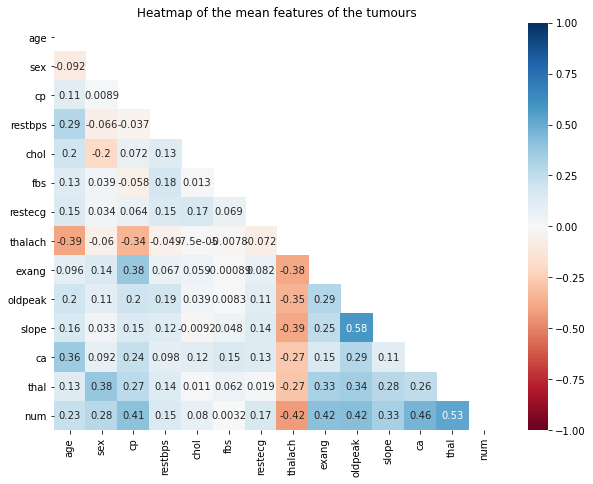

In [307]:
#Looking at the correlation of the target with the mean of the feature values
fig, ax = plt.subplots(figsize = (10,7.5))
corr = pd_df.corr()
matrix = np.triu(corr)
sb.heatmap(corr,annot=True,mask = matrix,cmap='RdBu', vmin =-1, vmax =1)
ax.set_title('Heatmap of the mean features of the tumours')

In [308]:
#The thal, ca, oldpeak,exang,thalach and cp variables respectively were the features with the most correlation to the target

In [309]:
pd_df.columns

Index(['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

## Feature Selection

In [310]:
#Creating a dataframe of features
features = pd_df[['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [311]:
features.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [312]:
#Assigning our features to the X variable
X = features
X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [313]:
#Assigning our predictor variables
y = pd_df['num'].values

In [314]:
y[0:10]

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [315]:
#Feature Standardization
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.94,  0.69, -2.24,  0.75, -0.28,  2.43,  1.01,  0.02, -0.7 ,
         1.07,  2.26, -0.72,  0.66],
       [ 1.38,  0.69,  0.87,  1.6 ,  0.74, -0.41,  1.01, -1.82,  1.44,
         0.38,  0.64,  2.48, -0.89],
       [ 1.38,  0.69,  0.87, -0.66, -0.35, -0.41,  1.01, -0.9 ,  1.44,
         1.33,  0.64,  1.41,  1.17],
       [-1.94,  0.69, -0.16, -0.1 ,  0.05, -0.41, -1.  ,  1.63, -0.7 ,
         2.1 ,  2.26, -0.72, -0.89],
       [-1.5 , -1.45, -1.2 , -0.1 , -0.84, -0.41,  1.01,  0.98, -0.7 ,
         0.3 , -0.98, -0.72, -0.89]])

In [316]:
X.shape

(297, 13)

## Model Selection and Fitting

In [317]:
#Creating training and test set

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (237, 13) (237,)
Test set: (60, 13) (60,)


In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [320]:
#Fitting our training set to a logistic regression classifier
log_reg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
log_reg

LogisticRegression(C=0.01, solver='liblinear')

In [321]:
#Making prediction on our test set
yhat_lr = log_reg.predict(X_test)
yhat_lr

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

## Model Evaluation

In [326]:
#Checking our Training and Test set accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, log_reg.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_lr))

Train set Accuracy:  0.8354430379746836
Test set Accuracy:  0.85


In [ ]:
#Our model has an accuracy score of 85% on the test set

In [324]:
print (classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [325]:
#Our model has a recall and f1-score of 85%
#Our model is able to correctly distinguish our class prediction